# MAT10000 Skin Classification Web App (EDA)

### Dataset taken from

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T





### 
Copied from the above webpage...

Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (follow_up), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesion_id-column within the HAM10000_metadata file.

Due to upload size limitations, images are stored in two files:

HAM10000_images_part1.zip (5000 JPEG files)
HAM10000_images_part2.zip (5015 JPEG files)

### Motivation and Objective:
(1)	One 0n five Americans have skin cancer by age 79

(2) Compared with other countries in the world, US has the highest number of skin cancer cases in the world.

(3) Building a web based app to detect skin cancer will help patients to consult the doctor in the early stage providing effective treatment.



### Step involved in this project:

(1) Importing essential libraries

(2) Creting directories for train and test

Step 3: Reading and Processing Data

Step 4: Data Cleaning

Step 5: Exploratory data analysis (EDA)

Step 6: Loading & Resizing of images

Step 7: Train Test Split

Step 8: Normalization

Step 9: Label Encoding

Step 10: Train validation split

Step 11: Model Building (CNN)

Step 12: Setting Optimizer & Annealing

Step 13: Fitting the model

Step 14: Model Evaluation (Testing and validation accuracy, confusion matrix, analysis of misclassified instances)



### Data Preprocessing

In [ ]:
# Calling all the libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# !conda info

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading metadata from excel file
# local_dir = '/Users/khan_m_a/Downloads/programs_data/skin_cancer/'
local_dir = '/content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/'

print(os.listdir(local_dir))
df = pd.read_csv(os.path.join(local_dir, 'data_dir/', 'HAM10000_metadata.csv'))
df.head(3)


['Good_Skin-Lesion-Classifier-master', 'skin-cancer-dl-model-688b51644741.json', 'MAT10000_3_17.h5', 'MAT10000_EDA_Modelling 3_23.ipynb', 'MAT10000_EDA_Modelling 4_1.ipynb', 'MAT10000_3_31.h5', 'data_dir', 'MAT10000_EDA.ipynb', 'MAT1000_pytorch.ipynb', 'MAT10000_EDA_Modelling.ipynb']


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
# Creating train and test directory
!pwd
data_dir = os.path.join(local_dir,'data_dir')

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

#create a list of all dx
dx_list = df['dx'].unique()
print(dx_list)

#create subdirectories in train and test dir 
tr_te_list = ['train', 'test']

for l in tr_te_list:
    l_path = os.path.join(data_dir,l)
    if not os.path.exists(l_path):
        os.mkdir(l_path)
        print('Dir created', l)

    for label in dx_list:
        lbl_dir = os.path.join(l_path,label)
        print('lbl_dir', lbl_dir)
        if not os.path.exists(lbl_dir):
            os.mkdir(lbl_dir)


/content
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/bkl
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/nv
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/df
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/mel
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/vasc
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/bcc
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/akiec
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/test/bkl
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/test/nv
lbl_dir /content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/test/df
lbl_dir /content/dri

In [ ]:
#split the train and test for df
y = df['dx']
X = df.drop('dx', axis=1).copy()
# X = df
print(X.shape, y.shape)

(10015, 6) (10015,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7511, 6) (2504, 6) (7511,) (2504,)


In [ ]:
# set image_id as index
df.set_index('image_id', inplace=True)

# list all image in folder
# f1 = os.listdir(os.path.join(local_dir,'Ham10000_images_part_1'))
# f2 = os.listdir(os.path.join(local_dir,'Ham10000_images_part_2'))

# list all images from X_train and X_test
train_list = list(X_train['image_id'])
test_list  = list(X_test['image_id'])
print( len(train_list), len(test_list))

7511 2504


In [ ]:
# transfer images to train and test directories
'''
for img in train_list:
    file_name = img + '.jpg'
    label = df.loc[img, 'dx'] # check image_id and save dx to label

    if file_name in f1:
        #source
        source = os.path.join(local_dir,'Ham10000_images_part_1',file_name)
        #destination
        destination = os.path.join(data_dir,tr_te_list[0],label,file_name)
        #copy from source to desination
        shutil.copyfile(source, destination)

    if file_name in f2:
        #source
        source = os.path.join(local_dir,'Ham10000_images_part_2',file_name)
        #destination
        destination = os.path.join(data_dir,tr_te_list[0],label,file_name)
        #copy from source to desination
        shutil.copyfile(source, destination)


for img in test_list:
    file_name = img + '.jpg'
    label = df.loc[img, 'dx'] # check image_id and save dx to label

    if file_name in f1:
        #source
        source = os.path.join(local_dir,'Ham10000_images_part_1',file_name)
        #destination
        destination = os.path.join(data_dir,tr_te_list[1],label,file_name)
        #copy from source to desination
        shutil.copyfile(source, destination)

    if file_name in f2:
        #source
        source = os.path.join(local_dir,'Ham10000_images_part_2',file_name)
        #destination
        destination = os.path.join(data_dir,tr_te_list[1],label,file_name)
        #copy from source to desination
        shutil.copyfile(source, destination)
'''



"\nfor img in train_list:\n    file_name = img + '.jpg'\n    label = df.loc[img, 'dx'] # check image_id and save dx to label\n\n    if file_name in f1:\n        #source\n        source = os.path.join(local_dir,'Ham10000_images_part_1',file_name)\n        #destination\n        destination = os.path.join(data_dir,tr_te_list[0],label,file_name)\n        #copy from source to desination\n        shutil.copyfile(source, destination)\n\n    if file_name in f2:\n        #source\n        source = os.path.join(local_dir,'Ham10000_images_part_2',file_name)\n        #destination\n        destination = os.path.join(data_dir,tr_te_list[0],label,file_name)\n        #copy from source to desination\n        shutil.copyfile(source, destination)\n\n\nfor img in test_list:\n    file_name = img + '.jpg'\n    label = df.loc[img, 'dx'] # check image_id and save dx to label\n\n    if file_name in f1:\n        #source\n        source = os.path.join(local_dir,'Ham10000_images_part_1',file_name)\n        #destin

In [ ]:
# setting train and test directories

train_path = local_dir + 'data_dir/train'
test_path = local_dir + 'data_dir/test'
print(os.listdir(train_path), '\n',os.listdir(test_path))

['bkl', 'akiec', 'mel', 'nv', 'df', 'bcc', 'vasc'] 
 ['df', 'mel', 'vasc', 'nv', 'akiec', 'bcc', 'bkl']


In [ ]:
os.listdir(train_path+ '/bkl')[0]

'ISIC_0030396.jpg'

The dimenstion of pic is : (450, 600, 3)


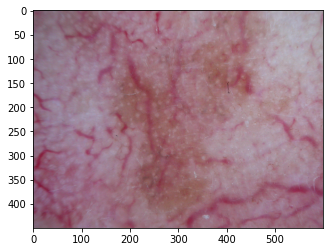

In [ ]:
skin_cell = train_path + '/bkl' + '/ISIC_0032929.jpg'
skin_img = imread(skin_cell)
print('The dimenstion of pic is :', skin_img.shape)
plt.imshow(skin_img);

In [ ]:
# checking how many files are there for train and test


for path, directories, files in os.walk(train_path):
    # print(path,directories)
    for d in directories:
        print(f"Train - {d} has {len(os.listdir(path + '/'+ d))} files")
       
print('*'*50)
for path, directories, files in os.walk(test_path):
    # print(path,directories)
    for d in directories:
        print(f"Test - {d} has {len(os.listdir(path + '/'+ d))} files")
        

Train - bkl has 814 files
Train - akiec has 241 files
Train - mel has 821 files
Train - nv has 5037 files
Train - df has 83 files
Train - bcc has 400 files
Train - vasc has 115 files
**************************************************
Test - df has 32 files
Test - mel has 292 files
Test - vasc has 27 files
Test - nv has 1668 files
Test - akiec has 86 files
Test - bcc has 114 files
Test - bkl has 285 files


# Prepare data for the model

## Data Augumentation

In [ ]:
# ImageDataGenerator?

In [ ]:
# generate the image generator

image_gen = ImageDataGenerator(
            rescale= 1./255, # column standarization
            rotation_range= 30, # rotate to 30 degree
            width_shift_range=0.05, # shift the width 5%
            height_shift_range=0.1, # shift the height 10
            shear_range= 0.1, # counter_clock shear intnsity
            zoom_range= 0.1, # zoom by 10% max
            horizontal_flip= True,
            # vertical_flip=True,
            fill_mode= 'nearest'
            )

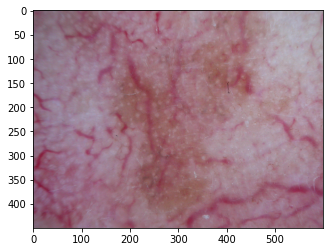

In [ ]:
plt.imshow(skin_img);

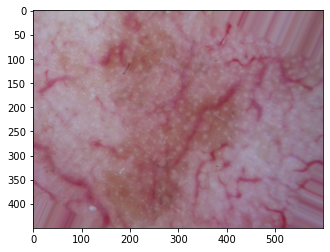

In [ ]:
# generate random images
plt.imshow(image_gen.random_transform(skin_img));

In [ ]:
# image_gen.flow_from_directory?

In [ ]:
# Generate Images by ImageDataGenerator

print(image_gen.flow_from_directory(train_path))
print('*'*50)
print(image_gen.flow_from_directory(test_path))


Found 7511 images belonging to 7 classes.
**************************************************
Found 2504 images belonging to 7 classes.


In [ ]:
# create train and test images
batch_size =16
img_shape = (254, 254,3) #(450, 450,3) 
train_img_gen = image_gen.flow_from_directory(
                train_path,
                batch_size= batch_size,
                target_size= img_shape[:-1], # except 3 from (450, 600, 3)
                class_mode = 'categorical',
                color_mode='rgb'
                )


test_img_gen = image_gen.flow_from_directory(
                test_path,
                batch_size= batch_size,
                target_size= img_shape[:-1], # except 3 from (450, 600, 3)
                class_mode = 'categorical',
                color_mode= 'rgb'
                )

Found 7511 images belonging to 7 classes.
Found 2504 images belonging to 7 classes.


In [ ]:
img_shape

(254, 254, 3)

# Creating CNN Model

In [ ]:
#https://www.tensorflow.org/tutorials/images/cnn

# CNN Model
model = Sequential()

model.add(Conv2D(32, (3,3),
                input_shape= img_shape,
                # kernel_initialization= 'he_uniform',
                activation= 'relu'
                )),
model.add(MaxPooling2D(pool_size= (2,2))),

model.add(Conv2D(64, (3, 3),
                activation= 'relu'
                ))
model.add(MaxPooling2D(pool_size= (2,2),)),

model.add(Conv2D(64, (3, 3),
                activation= 'relu'
                ))
model.add(MaxPooling2D(pool_size= (2,2),)),


model.add(Flatten())

model.add(Dense(128,
                activation= 'relu'))


# dropping 50% neuron using dropout
model.add(Dropout(0.5))



model.add(Dense(7, activation= 'softmax') )#only seven output
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [ ]:
# Early Stopping

early_stopping = EarlyStopping(monitor='val_loss',
                patience= 3
                )


In [ ]:
# Compile and run the model


model.compile(loss='categorical_crossentropy',
                optimizer= 'adam',
                metrics= ['accuracy']
                )

history = model.fit(train_img_gen,
                validation_data= test_img_gen,
                # callbacks= [early_stopping],
                epochs = 30
                )


Epoch 1/30
470/470 [==============================] - 4362s 9s/step - loss: 1.1494 - accuracy: 0.6581 - val_loss: 0.9593 - val_accuracy: 0.6661
Epoch 2/30
470/470 [==============================] - 223s 474ms/step - loss: 0.9801 - accuracy: 0.6750 - val_loss: 1.0546 - val_accuracy: 0.5970
Epoch 3/30
470/470 [==============================] - 219s 467ms/step - loss: 0.9314 - accuracy: 0.6706 - val_loss: 0.8650 - val_accuracy: 0.6689
Epoch 4/30
470/470 [==============================] - 219s 466ms/step - loss: 0.9341 - accuracy: 0.6663 - val_loss: 0.8476 - val_accuracy: 0.6733
Epoch 5/30
470/470 [==============================] - 219s 466ms/step - loss: 0.8760 - accuracy: 0.6758 - val_loss: 0.8715 - val_accuracy: 0.6697
Epoch 6/30
470/470 [==============================] - 218s 464ms/step - loss: 0.8542 - accuracy: 0.6806 - val_loss: 0.8567 - val_accuracy: 0.6801
Epoch 7/30
470/470 [==============================] - 218s 463ms/step - loss: 0.8878 - accuracy: 0.6729 - val_loss: 0.8445 - v

In [ ]:
1976/(60)

32.93333333333333

## Evaluating the model

In [ ]:
# load prviously saved model

# new_model = tf.keras.models.load_model('MAT10000_3_17.h5')

# new_model.summary()


In [ ]:
# loss, acc = new_model.evaluate(test_img_gen)

In [ ]:
# acc

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.059396,0.668752,0.959311,0.666134
1,0.983582,0.669684,1.054642,0.597045
2,0.923881,0.672214,0.865013,0.668930
3,0.908092,0.674877,0.847640,0.673323
4,0.882070,0.677540,0.871463,0.669728


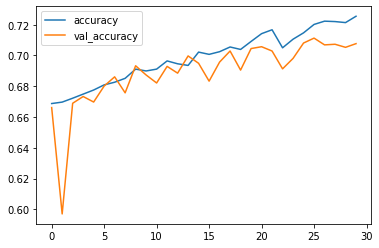

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

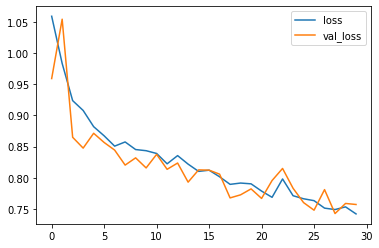

In [ ]:
losses[['loss', 'val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(test_img_gen)

157/157 [==============================] - 54s 343ms/step - loss: 0.7565 - accuracy: 0.7029


[0.756492018699646, 0.7028753757476807]

In [ ]:
local_dir


'/content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/'

In [ ]:
# save the model

model.save(local_dir + 'MAT10000_4_7.h5')

## Predictions

In [ ]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras

pred_prob = model.predict(test_img_gen)


In [ ]:
pred_prob[0]

array([2.0872594e-06, 5.8778496e-05, 1.3997378e-03, 2.9229391e-06,
       3.3256615e-04, 9.9820387e-01, 1.5901186e-08], dtype=float32)

In [ ]:
test_img_gen.classes.shape

(2504,)

In [ ]:

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_pred = np.argmax(pred_prob, axis =1)
print(rounded_pred[0], rounded_pred.shape)


5 (2504,)


In [ ]:
print(classification_report(test_img_gen.classes, rounded_pred))

              precision    recall  f1-score   support

           0       0.12      0.01      0.02        86
           1       0.08      0.13      0.10       114
           2       0.17      0.07      0.10       285
           3       0.00      0.00      0.00        32
           4       0.18      0.02      0.03       292
           5       0.67      0.86      0.75      1668
           6       0.05      0.04      0.04        27

    accuracy                           0.59      2504
   macro avg       0.18      0.16      0.15      2504
weighted avg       0.49      0.59      0.52      2504



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


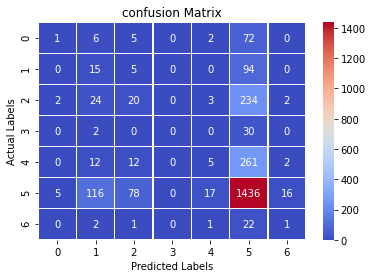

In [ ]:
# draw confusion matrix

conf_mat = confusion_matrix(test_img_gen.classes, rounded_pred)

sns.heatmap(conf_mat, annot= True, linewidths=0.5, fmt='d', cmap='coolwarm')
plt.title('confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

## Predicting an image



In [ ]:
skin_cell

'/content/drive/MyDrive/Data_Science/projects/MAT10000_skin_cancer/data_dir/train/bkl/ISIC_0032929.jpg'

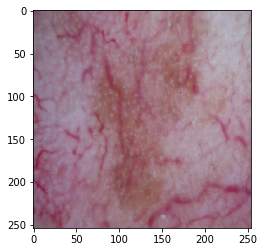

In [ ]:
random_image = image.load_img(skin_cell, target_size = img_shape)
plt.imshow(random_image)

In [ ]:
print(type(random_image))
my_random_image = image.img_to_array(random_image)
print(type(my_random_image))
print(my_random_image.shape)
my_random_image = np.expand_dims(my_random_image, axis=0)
print(my_random_image.shape)
pred_random_img = np.argmax(model.predict(my_random_image), axis=1)
print(f'The predicted class is  {dx_list[pred_random_img]}')
print('\n')
print(df.loc[df.index == 'ISIC_0032929'])

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(254, 254, 3)
(1, 254, 254, 3)
The predicted class is  ['bcc']


                lesion_id   dx dx_type   age     sex localization
image_id                                                         
ISIC_0032929  HAM_0003321  bkl   histo  75.0  female         face


In [ ]:
dx_list

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)